[sklearn.datasets.load_diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes)

In [1]:
# 載入diabetes Regression資料集
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [2]:
print(f'有哪些欄位資訊：{diabetes.keys()}')
print(f'Attribute Information: {diabetes.DESCR}') #藥用print才會好看^.^

有哪些欄位資訊：dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])
Attribute Information: .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, th

In [3]:
# 整理成pandas DataFrame
import pandas as pd

df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
# feature_names: list. The names of the dataset columns.

# 新增答案欄位
df_diabetes['answer'] = diabetes.target

df_diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,answer
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [4]:
# 匯出Excel及csv
df_diabetes.to_excel('regression_diabetes.xlsx', sheet_name='regression_diabetes', index=False) # excel
df_diabetes.to_csv('regression_diabetes.csv', encoding='utf-8', index=False)

In [5]:
# 資料前處理：確認是否有缺失值
df_diabetes.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
answer    0
dtype: int64

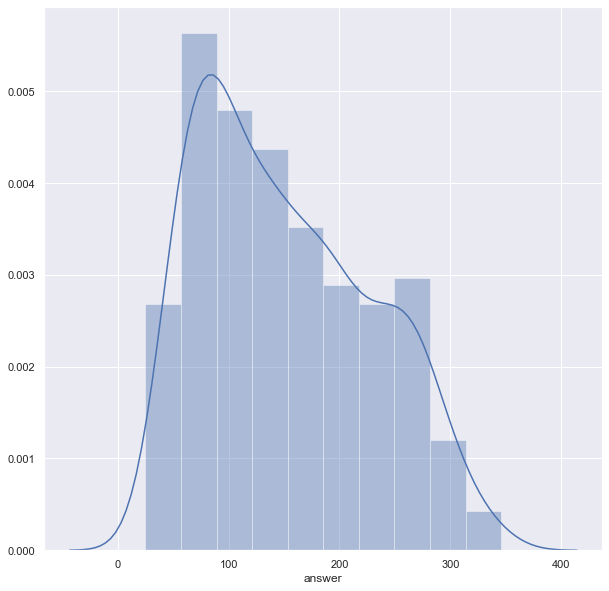

In [6]:
# 資料探索：資料視覺化，看一下資料之間的關係及分布
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 用seaborn一次把圖表的美化格式設定好，這裡是只有先設定圖表長寬
sns.set(rc = {'figure.figsize':(10,10)})
# 使用diabetes.target的資料，quantitative measure of disease progression
sns.distplot(df_diabetes['answer'])

plt.show()

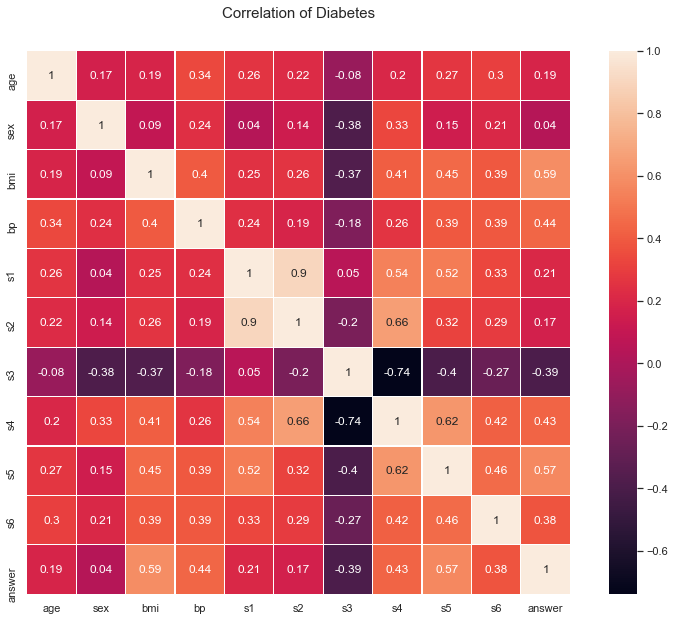

In [7]:
# 每個變數之間的關係
# 相關係數：兩個東西的相關性，觀察有哪些特徵變數和目標變數有較高的相關性
# 完全正相關:1；完全負相關:-1
plt.figure(figsize=(14,10))
plt.title('Correlation of Diabetes', y=1.05, size=15)
sns.heatmap(df_diabetes.astype(float).corr().round(2), linewidths=0.1, square=True, linecolor='white', annot=True)

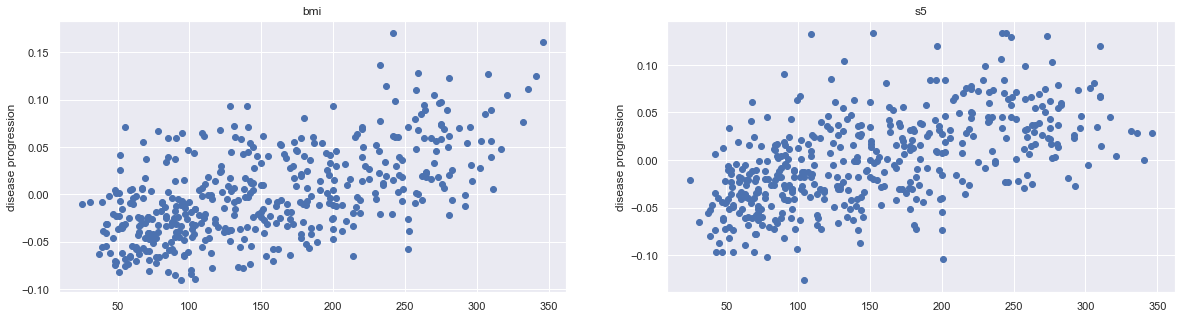

In [27]:
# 畫出bmi、s5與disease progression之間的關係
plt.figure(figsize=(20,5)) # 設定整張圖的長寬
features = ['bmi', 's5']
target = df_diabetes['answer']

for i, col in enumerate(features): 
    plt.subplot(1, len(features), i+1)
    # add data column into plot
    y = df_diabetes[col]
    x = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    # plt.xlabel(col)
    plt.ylabel('disease progression')

In [8]:
# 拆分資料 90%訓練資料 + 10%測試資料
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.1)

In [9]:
# 訓練資料
from sklearn.tree import DecisionTreeRegressor
regression_diabetes = DecisionTreeRegressor(max_depth=5)
regression_diabetes

DecisionTreeRegressor(max_depth=5)

In [10]:
regression_diabetes = regression_diabetes.fit(X_train, y_train)
regression_diabetes

DecisionTreeRegressor(max_depth=5)

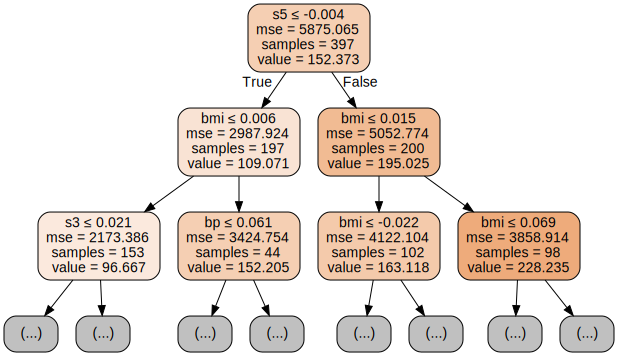

In [11]:
# 畫樹狀圖
from sklearn import tree
import graphviz
tree_diabetes = tree.export_graphviz(regression_diabetes, out_file=None, feature_names=diabetes.feature_names, \
                                     filled=True, rounded=True, special_characters=True, max_depth=2)
# feature_names: Names of each of the features. 

graphviz_diabetes = graphviz.Source(tree_diabetes)

graphviz_diabetes.render('diabetes') #輸出pdf
graphviz_diabetes

In [12]:
# 訓練資料分數
from sklearn.metrics import r2_score
score_train = r2_score(y_true=y_train, y_pred=regression_diabetes.predict(X_train))
print(f'預測準確率：{round(score_train*100,2)}%')

預測準確率：66.57%


In [13]:
# 預測測試資料
predict_diabetes = regression_diabetes.predict(X_test)
predict_diabetes


array([118.59183673,  87.11538462, 156.41666667, 178.30434783,
        93.73809524, 118.59183673,  87.11538462, 105.78947368,
       178.30434783,  87.11538462,  93.73809524, 118.59183673,
       178.30434783, 173.08      , 125.4       , 173.08      ,
       118.59183673,  71.11111111, 218.72413793,  87.11538462,
       173.08      , 118.59183673, 256.09090909, 173.        ,
        93.73809524, 178.30434783, 141.18181818, 256.09090909,
       178.30434783,  69.9       , 118.59183673,  69.9       ,
       105.78947368,  93.73809524, 178.30434783, 105.78947368,
       160.28571429, 160.28571429, 218.72413793, 159.        ,
       105.78947368, 173.08      ,  69.9       , 272.63636364,
       173.08      ])

In [14]:
# 實際測試資料答案
y_test

array([ 89.,  55., 109., 150.,  60.,  53.,  47.,  94., 174., 181.,  39.,
        53., 248.,  85., 302.,  68., 107., 182., 281., 132., 164.,  79.,
       215.,  48.,  84., 115.,  85., 258., 262.,  96., 111., 158., 162.,
        63., 233., 154., 263., 246., 265., 185., 214., 122.,  90., 308.,
       262.])

In [15]:
# 預測測試資料 與 實際測試資料答案 的差異
import numpy as np
np.subtract(predict_diabetes, y_test)

array([  29.59183673,   32.11538462,   47.41666667,   28.30434783,
         33.73809524,   65.59183673,   40.11538462,   11.78947368,
          4.30434783,  -93.88461538,   54.73809524,   65.59183673,
        -69.69565217,   88.08      , -176.6       ,  105.08      ,
         11.59183673, -110.88888889,  -62.27586207,  -44.88461538,
          9.08      ,   39.59183673,   41.09090909,  125.        ,
          9.73809524,   63.30434783,   56.18181818,   -1.90909091,
        -83.69565217,  -26.1       ,    7.59183673,  -88.1       ,
        -56.21052632,   30.73809524,  -54.69565217,  -48.21052632,
       -102.71428571,  -85.71428571,  -46.27586207,  -26.        ,
       -108.21052632,   51.08      ,  -20.1       ,  -35.36363636,
        -88.92      ])

In [16]:
# 查看分數
# ！！謹記，這裡不能用accuracy_score，而要用 r2_score！！
from sklearn.metrics import r2_score
score = r2_score(y_true=y_test, y_pred=predict_diabetes)
print(f'預測準確率：{round(score*100,2)}%')


預測準確率：31.62%


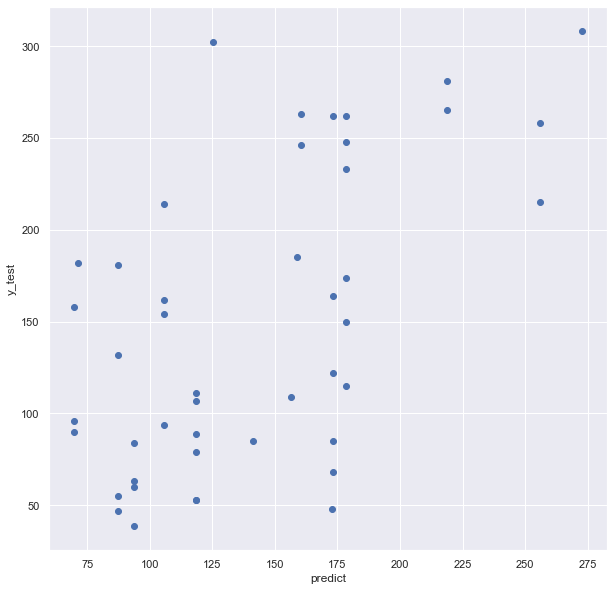

In [29]:
# 預測的目標變數資料和測試的目標變數資料畫成散佈圖
# plotting the y_test vs predict_diabetes
plt.scatter(predict_diabetes, y_test)
plt.xlabel('predict')
plt.ylabel('y_test')
plt.show()

In [17]:
# 特徵重要程度
print(f'最重要的特徵：{diabetes.feature_names[np.argmax(regression_diabetes.feature_importances_)]} ； 重要程度：{max(regression_diabetes.feature_importances_)}' )
print(f'特徵：{diabetes.feature_names}')
regression_diabetes.feature_importances_

最重要的特徵：s5 ； 重要程度：0.5149868795725452
特徵：['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


array([1.70341389e-04, 9.28752345e-03, 2.84022227e-01, 5.30688764e-02,
       4.56622795e-02, 1.67468269e-02, 3.56945707e-02, 0.00000000e+00,
       5.14986880e-01, 4.03604755e-02])